In [3]:
import censusdata
import pandas as pd

pd.set_option('display.precision',2)

In [5]:
censusdata.search('acs5',2019,'concept','housing costs as a percentage of household income')

[('B25101_001E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
  'Estimate!!Total:'),
 ('B25101_002E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
  'Estimate!!Total:!!With a mortgage:'),
 ('B25101_003E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
  'Estimate!!Total:!!With a mortgage:!!Less than $20,000:'),
 ('B25101_004E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
  'Estimate!!Total:!!With a mortgage:!!Less than $20,000:!!Less than 20 percent'),
 ('B25101_005E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
  'Estimate!!Total:!!With a mortgage:!!Less than $20,000:!!20 to 29 percent'),
 ('B25101_006E',
  'MORTGAGE STATUS BY MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST

In [8]:
censusdata.printtable(censusdata.censustable('acs5',2019,'B25106'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25106_001E  | TENURE BY HOUSING COSTS AS A P | !! Estimate Total:                                       | int  
B25106_002E  | TENURE BY HOUSING COSTS AS A P | !! !! Estimate Total: Owner-occupied housing units:      | int  
B25106_003E  | TENURE BY HOUSING COSTS AS A P | !! !! !! Estimate Total: Owner-occupied housing units: L | int  
B25106_004E  | TENURE BY HOUSING COSTS AS A P | !! !! !! !! Estimate Total: Owner-occupied housing units | int  
B25106_005E  | TENURE BY HOUSING COSTS AS A P | !! !! !! !! Estimate Total: Owner-occupied housing units | int  
B25106_006E  | TENURE BY HOUSING COSTS AS A P | !! !! !! !! Estimate Total: Owner-occupied housing units | int  
B25106_007E  | TENURE BY HOUSING COSTS AS A P | !! !! !! Estimate Total: Owner-occupied housi

In [127]:
dt = censusdata.download(
    'acs5',2019,
    censusdata.censusgeo([('state','53'),('tract','*')]),
    [
        'B25106_001E',                   #total
        'B25106_002E',                   #owner occupied
        'B25106_003E','B25106_006E',     #income <$20k
        'B25106_007E','B25106_010E',     #income $20kto35k
        'B25106_011E','B25106_014E',     #income $35kto50k
        'B25106_015E','B25106_018E',     #income $50kto75k
        'B25106_019E','B25106_022E',     #income >$75k
        'B25106_023E',                   #income negative
        'B25106_024E',                   #renter
        'B25106_025E','B25106_028E',     #income <$20k
        'B25106_029E','B25106_032E',     #income $20kto35k
        'B25106_033E','B25106_036E',     #income $35kto50k
        'B25106_037E','B25106_040E',     #income $50kto75k
        'B25106_041E','B25106_044E',     #income >$75k
        'B25106_045E'                    #income negative
    ]
)

In [128]:
dt = dt.rename(
    columns={
        'B25106_001E':'total',
        'B25106_002E':'owner',
        'B25106_024E':'renter'
    }
)

In [129]:
dt['owner_burden']=dt.B25106_006E+dt.B25106_010E+dt.B25106_014E+dt.B25106_018E+dt.B25106_022E+dt.B25106_023E
dt['renter_burden']=dt.B25106_028E+dt.B25106_032E+dt.B25106_036E+dt.B25106_040E+dt.B25106_044E+dt.B25106_045E
dt['total_burden']=dt.owner_burden+dt.renter_burden

In [130]:
dt=dt.reset_index()

In [131]:
dt['county']=dt['index'].astype('str').str.split(',',expand=True)[1]

In [142]:
dt['tract']=dt['index'].astype('str').str.split(',',expand=True)[0]

In [163]:
dt_county=dt.groupby(by='county')[['total','total_burden','owner_burden','renter_burden']].sum().reset_index()
dt_county

,county,total,total_burden,owner_burden,renter_burden
0,Adams County,5973,1682,944,738
1,Asotin County,9101,2253,1127,1126
2,Benton County,72121,18468,8731,9737
3,Chelan County,28384,7888,4151,3737
4,Clallam County,32958,10277,5690,4587
5,Clark County,174661,55124,27502,27622
6,Columbia County,1795,474,295,179
7,Cowlitz County,41952,13794,6708,7086
8,Douglas County,15263,3580,2271,1309
9,Ferry County,3060,843,527,316


In [177]:
dt_state=pd.DataFrame(
    {
        "total":dt_county.total.sum(),
        "total_burden":dt_county.total_burden.sum(),
        "owner_burden":dt_county.owner_burden.sum(),
        "renter_burden":dt_county.renter_burden.sum(),
        "in20bl":dt.B25106_006E.sum()+dt.B25106_028E.sum(),
        "in20to35":dt.B25106_010E.sum()+dt.B25106_032E.sum(),
        "in35to50":dt.B25106_014E.sum()+dt.B25106_036E.sum(),
        "in50to75":dt.B25106_018E.sum()+dt.B25106_040E.sum(),
        "in75ab":dt.B25106_022E.sum()+dt.B25106_044E.sum()
    },
    index=[0]
)

In [182]:
dt_state_melt=dt_state.melt(value_vars=['in20bl','in20to35','in35to50','in50to75','in75ab'])
dt_state_melt

,variable,value
0,in20bl,239854
1,in20to35,216619
2,in35to50,166605
3,in50to75,164061
4,in75ab,115584


In [136]:
import matplotlib.pyplot as plt

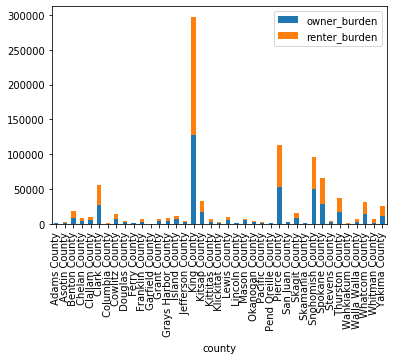

In [165]:
dt_county[['county','owner_burden','renter_burden']].plot(kind='bar',x='county',stacked=True)

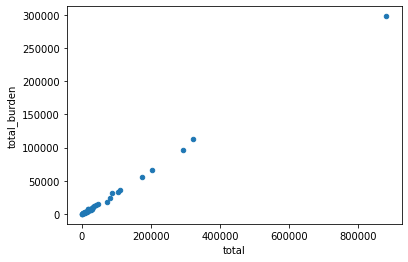

In [179]:
dt_county.plot(kind='scatter',x='total',y='total_burden')

(-1.25, 1.25, -1.25, 1.25)

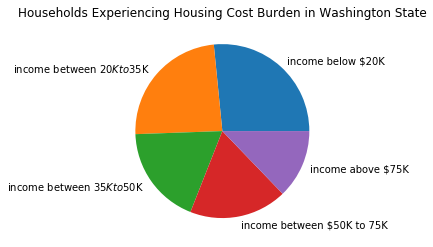

In [194]:
dt_state_melt.plot(
    kind='pie',y='value',
    labels=[
        'income below $20K',
        'income between $20K to $35K',
        'income between $35K to $50K',
        'income between $50K to 75K',
        'income above $75K'
    ],
    legend=False,
    title = 'Households Experiencing Housing Cost Burden in Washington State'
).axis('off')